## selenium을 이용하여 새올 전자민원 창구의 민원 데이터를 자동화 크롤링 하기

In [1]:
#셀레니움 설치
!pip install selenium

In [2]:
# 웹드라이버매니저 설치
!pip install webdriver_manager

In [10]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', None)

In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 별도의 크롬 드라이버 설치 없이 크롬을 실행하는 방법
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

# 크롬 옵션 설정
options = Options()
options.add_experimental_option('detach', True) # 브라우저 바로 닫힘 방지
options.add_experimental_option('excludeSwitches', ['enable-logging']) # 불필요한 메시지 제거

# name_list = ['bukgu', 'DalSeongGun', 'DalSugu', 'DongGu', 'JungGu', 'NamGu', 'Seogu', 'Suseonggu']
name_list = ['DalSugu', 'DongGu', 'JungGu', 'NamGu', 'Seogu', 'Suseonggu']

# url_list = ['https://eminwon.buk.daegu.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
#            'https://eminwon.dalseong.daegu.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
#            'https://eminwon.dalseo.daegu.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
#            'https://eminwon.dong.daegu.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
#            'https://eminwon.jung.daegu.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
#            'https://eminwon.nam.daegu.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
#            'https://eminwon.dgs.go.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
#            'http://eminwon.suseong.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do']

url_list = ['https://eminwon.dalseo.daegu.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
           'https://eminwon.dong.daegu.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
           'https://eminwon.jung.daegu.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
           'https://eminwon.nam.daegu.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
           'https://eminwon.dgs.go.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do',
           'http://eminwon.suseong.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do']

#크롬 드라이버 객체 생성
chrome_driver = ChromeDriverManager().install()
driver = webdriver.Chrome(chrome_driver, options=options)

In [17]:
# 각 구마다 반복
for i, v in enumerate(name_list):
    # 해당 구의 url
    url = url_list[i]
    # url 로 이동
    driver.get(url)
    
    #우리가 찾으려는 메뉴는 마우스 hover를 해야지 열리는 메뉴이기 때문에 ActionChains을 이용
    # ActionChains 객체를 생성
    action = ActionChains(driver)

    # 행정정보 공개탭
    main_menu_selector = '#header > div.gnbmiddle > div > div.topmenu > ul > li:nth-child(2) > a'

    # 메뉴를 가리키는 요소를 찾아서 마우스를 올리기
    menu = driver.find_element(By.CSS_SELECTOR, main_menu_selector)
    action.move_to_element(menu).perform()

    # 서브 메뉴가 나타나면 서브 메뉴 클릭
    sub_menu_selector = '#allmenu > div > div:nth-child(2) > div:nth-child(3) > ul > li:nth-child(1) > a'
    driver.find_element(By.CSS_SELECTOR, sub_menu_selector).click()
    
    
    
    # 크롤링한 정보를 담는 리스트
    dept_list = [] # 부서 리스트
    content_list = [] # 민원사무명 리스트
    
    
    # 2010년까지 크롤링
    for y in range(13):
        # 캘린더 선택, 날짜 설정 6개월 단위로 가능하므로 1~6 / 7~12 나눠서 진행
        for j in range(2):
            # 캘린더 선택, search
            # 시작 년도, 월, 일
            date_selector = '#DivSearch22 > img:nth-child(4)'
            driver.find_element(By.CSS_SELECTOR, date_selector).click()

            if j == 0:
                # 년도 선택 칸 클릭
                year_selector = '#ui-datepicker-div > div > div > select.ui-datepicker-year'
                driver.find_element(By.CSS_SELECTOR, year_selector).click()

                # 작년 선택 (년도를 클릭 할때마다 전, 후 5년으로 list가 바뀜, 전년도는 option:nth-child(5) 고정)
                # css 는 안먹고 xpath 는 먹는다
                # last_year_selector = '#ui-datepicker-div > div > div > select.ui-datepicker-year > option:nth-child(5)'
                last_year_selector =  '//*[@id="ui-datepicker-div"]/div/div/select[1]/option[5]'
                driver.find_element(By.XPATH, last_year_selector).click()

            # 월 선택 칸 클릭
            month_selector = '#ui-datepicker-div > div > div > select.ui-datepicker-month'
            driver.find_element(By.CSS_SELECTOR, month_selector).click()

            if j == 0:
                # 1월 선택 
                jan_month_selector = '//*[@id="ui-datepicker-div"]/div/div/select[2]/option[1]'
                driver.find_element(By.XPATH, jan_month_selector).click()
            else:
                # 7월 선택
                jul_month_selector = '//*[@id="ui-datepicker-div"]/div/div/select[2]/option[7]'
                driver.find_element(By.XPATH, jul_month_selector).click()

            # 1일 선택
            ## 년도가 달라지면 selector 가 달라지는 듯? 오류남
            ### --> 년도 마다 각 월의 달력 모양새가 다름. 몇주로 이루어져 있는지, 무슨 요일로 시작해 무슨 요일로 끝나는지
            # 다른 연도에는 적용하지 못함
            # first_day_selector = '#ui-datepicker-div > table > tbody > tr:nth-child(1) > td:nth-child(7) > a'
            #ui-datepicker-div > table > tbody > tr:nth-child(1) > td:nth-child(7) > a
            first_day_selector = '#ui-datepicker-div > table > tbody > tr:first-child a.ui-state-default:first-of-type'
            #first_day_selector = '#ui-datepicker-div > table > tbody td.ui-datepicker-week-end:first-of-type' 
            driver.find_element(By.CSS_SELECTOR, first_day_selector).click()



            # 끝 년도, 월, 일
            date_selector = '#DivSearch22 > img:nth-child(8)'
            driver.find_element(By.CSS_SELECTOR, date_selector).click()

            if j == 0:
                # 년도 선택 칸 클릭
                year_selector = '#ui-datepicker-div > div > div > select.ui-datepicker-year'
                driver.find_element(By.CSS_SELECTOR, year_selector).click()

                # 작년 선택 (년도를 클릭 할때마다 전, 후 5년으로 list가 바뀜, 전년도는 option:nth-child(5) 고정)
                # css 는 안먹고 xpath 는 먹는다
                # last_year_selector = '#ui-datepicker-div > div > div > select.ui-datepicker-year > option:nth-child(5)'
                last_year_selector =  '//*[@id="ui-datepicker-div"]/div/div/select[1]/option[5]'
                driver.find_element(By.XPATH, last_year_selector).click()

            # 월 선택 칸 클릭
            month_selector = '#ui-datepicker-div > div > div > select.ui-datepicker-month'
            driver.find_element(By.CSS_SELECTOR, month_selector).click()

            if j == 0:
                #6월 선택 
                jan_month_selector = '//*[@id="ui-datepicker-div"]/div/div/select[2]/option[6]'
                driver.find_element(By.XPATH, jan_month_selector).click()
            else:
                # 12월 선택 
                dec_month_selector = '//*[@id="ui-datepicker-div"]/div/div/select[2]/option[12]'
                driver.find_element(By.XPATH, dec_month_selector).click()

            # 30일 / 31일 선택
            #first_day_selector = '#ui-datepicker-div > table > tbody > tr:nth-child(5) > td:nth-child(5) > a'
            last_day_selector = '#ui-datepicker-div > table > tbody  > tr:last-child a.ui-state-default:last-of-type' 
            ####### 30일 선택이 도저히 안됨.................... 마지막주 첫째날만 선택된다.
            #last_day_selector = '#ui-datepicker-div > table > tbody  > tr:last-child > td[data-handler="selectDay"]:last-of-type'
            # last_day_selector = '#ui-datepicker-div > table > tbody  > tr:last-child a:contains("30")'
            driver.find_element(By.CSS_SELECTOR, last_day_selector).click()


            # 페이지당 자료 수 - 50 개로 설정
            page_selector = '#pageSize2'
            driver.find_element(By.CSS_SELECTOR, page_selector).click()

            # 50 개 선택
            fifty_selector = '//*[@id="pageSize2"]/option[5]'
            driver.find_element(By.XPATH, fifty_selector).click()


            # 조회
            search_selector = '#searchBtn'
            driver.find_element(By.CSS_SELECTOR, search_selector).click()

            # 게시글 개수 가져오기
            num_selector = 'body > main > div > div.content-explain > div'
            total_num = driver.find_element(By.CSS_SELECTOR, num_selector).text

            # 총 N 건 -> split
            total_num = int(total_num.split(' ')[1])
            print(2023-y-1, name_list[i], total_num)

            
            #각 페이지 크롤링
            next_selector = '#navigator > a.navi.navi-arrow.navi-arrow-single-right'

            row_no = 50

            # # 페이지 수 만큼 반복
            for k in range(math.ceil(total_num/50)):
                # 마지막 페이지
                if k == math.ceil(total_num/50) - 1:
                    row_no = total_num % 50

                for k in range(row_no):
                    # 민원사무명
                    content_selector = f'#dataSetTb > table > tbody > tr:nth-child({k+1}) > td.td-list > a'
                    content = driver.find_element(By.CSS_SELECTOR, content_selector).text
                    content_list.append(content)

                    # 부서
                    dept_selector = f'#dataSetTb > table > tbody > tr:nth-child({k+1}) > td:nth-child(6)'
                    dept = driver.find_element(By.CSS_SELECTOR, dept_selector).text
                    dept_list.append(dept)

                driver.find_element(By.CSS_SELECTOR, next_selector).click() 
      
    
    
    # 구 크롤링 완료 
    print(name_list[i], len(content_list))
    
    #수집한 정보를 데이터 프레임으로 저장
    df = pd.DataFrame({'content': content_list,
                       'dept': dept_list
                      })

    df.loc[df['dept'].str.endswith(('읍', '면', '동')), 'dept'] = '읍/면/동사무소'

    # content : dept 중복
    df_temp = df.drop(df.loc[df.duplicated(keep=False)].index)
    
    # 같은 content 가 다른 dept 에서 처리된 경우
    mask = df_temp['content'].duplicated(keep=False)
    df = df_temp.loc[~mask]
    
    print(name_list[i], '중복 값 제거:', df.shape[0])
    
    df.to_csv('C:/Users/User/Desktop/경현/프로젝트/민원/Daegu_Complain_Classifficaion/전처리/경현/크롤링/complain_' + name_list[i] + '_plus.csv', index = False)
    
    print('\n\n')
        
        
        
# 크롤링 완료
driver.quit()

2022 bukgu 4667
2022 bukgu 4156
2021 bukgu 5537
2021 bukgu 4963
2020 bukgu 4990
2020 bukgu 5342
2019 bukgu 5999
2019 bukgu 4957
2018 bukgu 5855
2018 bukgu 5675
2017 bukgu 5236
2017 bukgu 5574
2016 bukgu 5902
2016 bukgu 5094
2015 bukgu 4820
2015 bukgu 6206
2014 bukgu 4792
2014 bukgu 5262
2013 bukgu 4842
2013 bukgu 4949
2012 bukgu 4365
2012 bukgu 5466
2011 bukgu 3977
2011 bukgu 4076
2010 bukgu 3747
2010 bukgu 3741
bukgu 130190
bukgu 중복 값 제거: 94



2022 DalSeongGun 4701
2022 DalSeongGun 3954
2021 DalSeongGun 4737
2021 DalSeongGun 3980
2020 DalSeongGun 4298
2020 DalSeongGun 4480
2019 DalSeongGun 4726
2019 DalSeongGun 4275
2018 DalSeongGun 4566
2018 DalSeongGun 4356
2017 DalSeongGun 4483
2017 DalSeongGun 4489
2016 DalSeongGun 3807
2016 DalSeongGun 3776
2015 DalSeongGun 3660
2015 DalSeongGun 3673
2014 DalSeongGun 3261
2014 DalSeongGun 3518
2013 DalSeongGun 3895
2013 DalSeongGun 3432
2012 DalSeongGun 5208
2012 DalSeongGun 3890
2011 DalSeongGun 3643
2011 DalSeongGun 3365
2010 DalSeongGun 3446


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=112.0.5615.138)


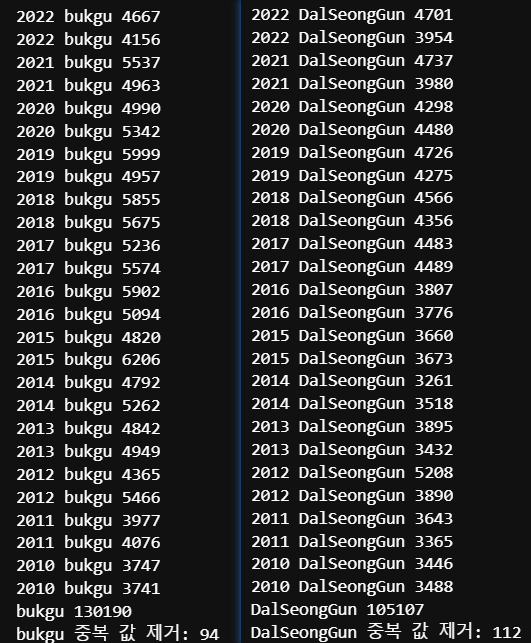

In [147]:
pd.read_csv('C:/Users/User/Desktop/경현/프로젝트/민원/Daegu_Complain_Classifficaion/전처리/경현/크롤링/complain_Bukgu_plus.csv')

,content,dept
0,건설기계사업자 변경신고,도시국 건설과
1,건설업상속신고,신성장전략국 일자리정책과
2,건설기계대여업등록,도시국 건설과
3,식품영업허가,보건소 위생과
4,유원시설업 (조건부영업)허가,신성장전략국 관광과
5,전화권유판매업변경신고,신성장전략국 일자리정책과
6,폐수배출시설 설치허가신청(설치신고),복지환경국 환경관리과
7,폐기물처리업(폐기물처리 신고자) 휴업·폐업·재개업 신고,복지환경국 자원순환과
8,배출부과금 징수유예 및 분납신청,복지환경국 환경관리과
9,"가축분뇨관련영업 [허가신청서, 변경허가신청서, 변경신고서]",복지환경국 환경관리과


In [8]:
# driver.quit()